# MNIST Data Set - Basic Approach

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

# Split the full training set into new training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.1, random_state=42
)

2024-10-27 16:34:46.693910: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-27 16:34:47.709341: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-10-27 16:34:47.709374: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-10-27 16:34:51.050142: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

In [2]:
len(x_train)

54000

In [3]:
len(x_test)

10000

In [4]:
y_train[0]

1

### Visualizing the Data

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
x_train[1].shape

(28, 28)

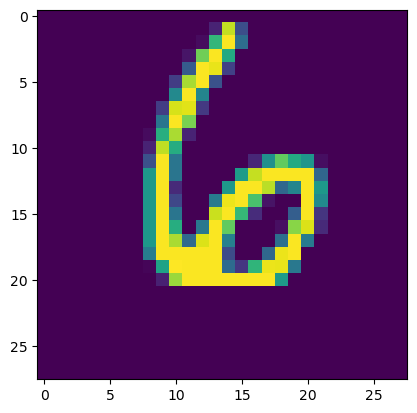

In [6]:
plt.imshow(x_train[1])

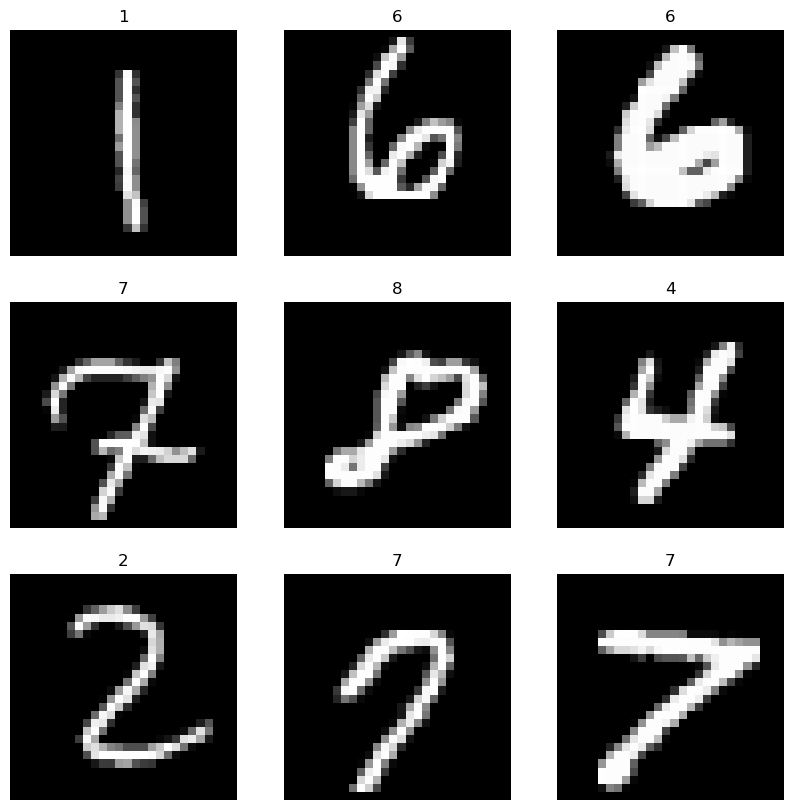

In [7]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i],cmap='gist_gray')
    plt.title(int(y_train[i]))
    plt.axis("off")

In [8]:
x_train[1].max()

255

## Create the Model From Scratch

In [9]:
x = tf.constant([[0.0] * 784])
# Define model variables and operations
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784, 10]), name="weights")
b = tf.Variable(tf.zeros([10]), name="biases")


2024-10-27 16:34:56.667603: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-10-27 16:34:56.667648: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-10-27 16:34:56.667829: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-10-27 16:34:56.676931: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Define the model function
def model(x):
    return tf.matmul(x, W) + b

In [11]:
# Define the loss function
def compute_loss(logits, labels):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))


In [12]:
# Define the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)

In [13]:
# Training step function
def train_step(x_batch, y_batch):
    with tf.GradientTape() as tape:
        logits = model(x_batch)
        loss = compute_loss(logits, y_batch)
    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    return loss

### Model Training

In [14]:
# Preprocess the dataset
x_train, x_test, x_val = x_train.reshape(-1, 784).astype("float32") / 255.0, x_test.reshape(-1, 784).astype("float32") / 255.0, x_val.reshape(-1, 784).astype("float32") / 255.0
y_train, y_test, y_val = to_categorical(y_train, 10), to_categorical(y_test, 10), to_categorical(y_val, 10)

# Training loop
num_steps = 1000
batch_size = 100
for step in range(num_steps):
    # Randomly sample a batch of data
    indices = tf.random.uniform([batch_size], 0, x_train.shape[0], dtype=tf.int32)
    x_batch, y_batch = tf.gather(x_train, indices), tf.gather(y_train, indices)
    
    loss = train_step(x_batch, y_batch)
    if step % 100 == 0:
        print(f"Step {step}, Loss: {loss.numpy()}")

Step 0, Loss: 2.3025851249694824
Step 100, Loss: 0.36093395948410034
Step 200, Loss: 0.3663933575153351
Step 300, Loss: 0.3390823304653168
Step 400, Loss: 0.30080923438072205
Step 500, Loss: 0.24655655026435852
Step 600, Loss: 0.29121077060699463
Step 700, Loss: 0.3860180974006653
Step 800, Loss: 0.2795690894126892
Step 900, Loss: 0.2807784676551819


In [15]:
# Evaluate the model on the test set
logits_test = model(x_test)
predictions = tf.argmax(logits_test, axis=1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, tf.argmax(y_test, axis=1)), tf.float32))
print("Test accuracy:", accuracy.numpy())

Test accuracy: 0.9171
